In [90]:
import pandas as pd
df_all = pd.read_csv(r'C:\Users\clint\Desktop\Research-Paper-Trucks\Exploration\1\all_df.csv')
df_all

,REPORT_DATE,FATALITIES,COUNTY,change_2006_2016,indicator_2002_2006,indicator_1999_2001,indicator_1993_1998
0,2005-06-06,1,37185,-1.0,1,0,0
1,2005-05-14,2,35057,-1.0,1,0,0
2,2005-12-15,1,37159,0.0,1,0,0
3,2005-12-09,1,32003,-3.0,1,0,0
4,2005-07-28,1,34003,-1.0,1,0,0
...,...,...,...,...,...,...,...
361,1995-08-27,2,47065,1.0,0,0,1
362,1999-10-23,3,47089,-1.0,0,1,0
363,2000-08-06,2,47055,-1.0,0,1,0
364,1999-06-14,2,47145,0.0,0,1,0


https://www.latlong.net/category/cities-236-15.html
//
https://www.batchgeo.com/map/cities-latitude-longitude

// verified with other LLM models
// google goecoding service


In [91]:
import pandas as pd
df_places = pd.read_csv(r'C:\Users\clint\Desktop\Research-Paper-Trucks\Exploration\2\places_with_coordinates.csv')
df=df_places

In [92]:
df

,Metropolitan Area or Part,Region,Family,Latitude,Longitude
0,Atlanta,S,Middle America,33.750127,-84.388521
1,Austin,S,Austin,30.267153,-97.743061
2,Boston (MA),NE,Exclusion with Restriction,42.355508,-71.056536
3,Boston (NH),NE,Extreme Exclusion,42.976194,-71.693963
4,Buffalo,NE,Middle America,42.886447,-78.878369
...,...,...,...,...,...
68,Washington (DC),S,*,38.907192,-77.036871
69,Washington (MD),S,Containment-Lite,39.613048,-77.699420
70,Washington (VA),S,Middle America,38.713430,-78.159081
71,Washington (WV),S,*,39.244853,-81.663776


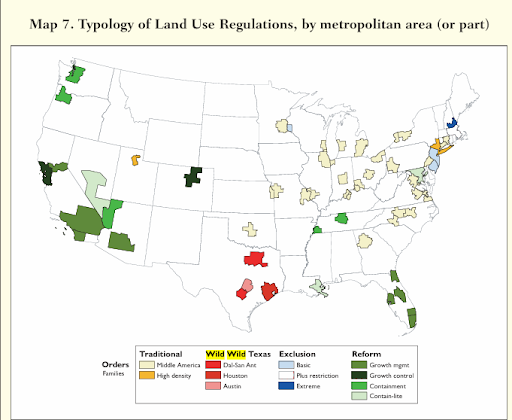

In [93]:
from IPython.display import Image

# Display the image
Image(filename=r'C:\Users\clint\Desktop\Research-Paper-Trucks\Text Template\images\unnamed (1).png')

In [94]:

import pandas as pd
import geopandas as gpd

# Assuming your DataFrame is named df
# df = pd.read_csv('your_file.csv') # Load your data if it's in a CSV file

# Define the function to determine the color
def get_color(family, area):
    family = family.lower()
    area = area.lower()
    if 'growth' in family or 'containment' in family:
        return 'green'
    elif 'middle' in family or 'high' in family:
        return 'orange'
    elif 'basic' in family or 'plus' in family or 'extreme' in family or 'restriction' in family:
        return 'blue'
    elif 'antonio' in family or 'houston' in family or 'austin' in family:
        return 'red'
    else:
        return 'black'

# Apply the function to create a new column for colors
df['Color'] = df.apply(lambda row: get_color(row['Family'], row['Metropolitan Area or Part']), axis=1)
df


,Metropolitan Area or Part,Region,Family,Latitude,Longitude,Color
0,Atlanta,S,Middle America,33.750127,-84.388521,orange
1,Austin,S,Austin,30.267153,-97.743061,red
2,Boston (MA),NE,Exclusion with Restriction,42.355508,-71.056536,blue
3,Boston (NH),NE,Extreme Exclusion,42.976194,-71.693963,blue
4,Buffalo,NE,Middle America,42.886447,-78.878369,orange
...,...,...,...,...,...,...
68,Washington (DC),S,*,38.907192,-77.036871,black
69,Washington (MD),S,Containment-Lite,39.613048,-77.699420,green
70,Washington (VA),S,Middle America,38.713430,-78.159081,orange
71,Washington (WV),S,*,39.244853,-81.663776,black


In [95]:
import pandas as pd

# Assuming your DataFrame is named df
# Define the latitude and longitude bounds for the US
us_lat_bounds = (24.396308, 49.384358)
us_lon_bounds = (-125.0, -66.93457)

# Filter rows where the latitude and longitude are outside the US bounds
outside_us_df = df[
    (df['Latitude'] < us_lat_bounds[0]) | (df['Latitude'] > us_lat_bounds[1]) |
    (df['Longitude'] < us_lon_bounds[0]) | (df['Longitude'] > us_lon_bounds[1])
]

outside_us_df

,Metropolitan Area or Part,Region,Family,Latitude,Longitude,Color


In [96]:
blackx_places = df[df['Color'] == 'black']
blackx_places

,Metropolitan Area or Part,Region,Family,Latitude,Longitude,Color
6,Charlotte (SC),S,*,35.227087,-80.843127,black
10,Cincinnati (IN),MW,*,39.020047,-86.728891,black
31,Memphis (AR),S,*,35.146542,-90.184786,black
32,Memphis (MS),S,*,35.149534,-90.048980,black
43,New York (PA),NE,*,41.203322,-77.194525,black
44,Norfolk (NC),S,*,36.850769,-76.285873,black
48,Philadelphia (DE),S,*,39.952584,-75.165222,black
49,Philadelphia (MD),S,*,39.045755,-76.641271,black
55,Portland (WA),W,*,45.515232,-122.678385,black
68,Washington (DC),S,*,38.907192,-77.036871,black


C:\Users\clint\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\plotting.py:306: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  collection = ax.scatter(x, y, vmin=vmin, vmax=vmax, cmap=cmap, **kwargs)


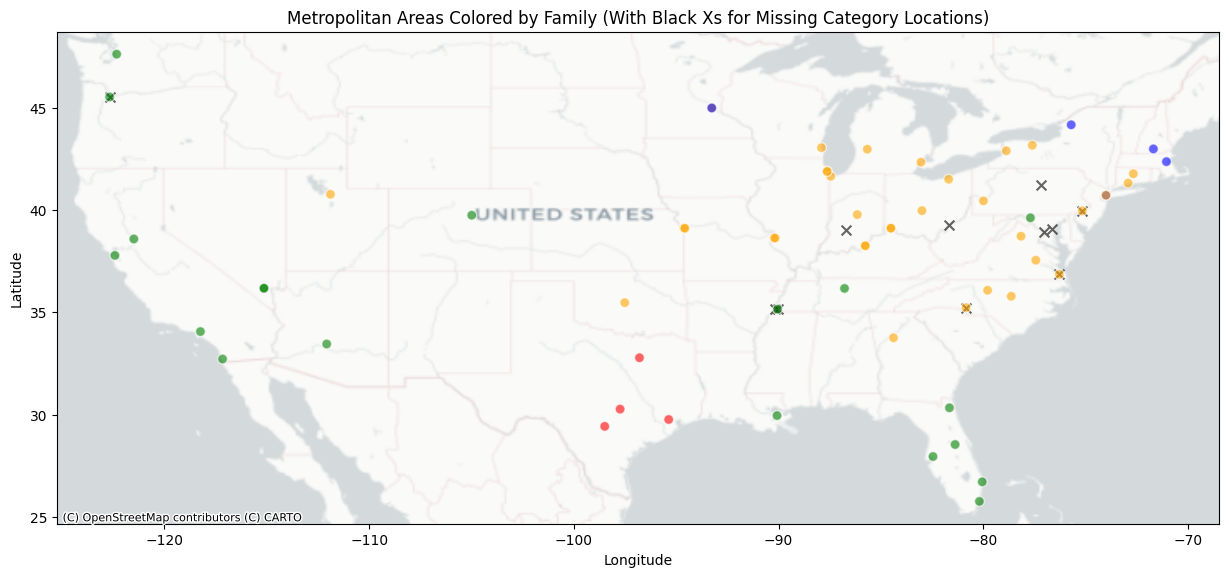

In [97]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

def plot_geodata(df):
    # Convert the DataFrame to a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

    # Set the CRS to WGS84 (EPSG:4326)
    gdf.set_crs(epsg=4326, inplace=True)

    # Separate the black points from the rest
    black_points = gdf[gdf['Color'] == 'black']
    other_points = gdf[gdf['Color'] != 'black']

    # Plot the data
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))

    # Plot black points with 'x' markers if they exist
    if not black_points.empty:
        black_points.plot(ax=ax, color='black', markersize=50, alpha=0.6, edgecolor='w', marker='x')

    # Plot other points with circle markers
    other_points.plot(ax=ax, color=other_points['Color'], markersize=50, alpha=0.6, edgecolor='w')

    # Add a basemap
    ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

    # Add labels and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Metropolitan Areas Colored by Family (With Black Xs for Missing Category Locations)')

    # Show the plot
    plt.show()


plot_geodata(df)

In [98]:
import pandas as pd
from scipy.spatial import KDTree

# Assuming df is already defined
# Filter rows where color is black
blackx_rows = df[df['Color'] == 'black']

# Filter rows where color is not black
non_black_rows = df[df['Color'] != 'black']

# Create a KDTree for fast nearest neighbor search using non-black rows
coords = non_black_rows[['Latitude', 'Longitude']].values
tree = KDTree(coords)

# Function to find the nearest neighbor
def find_nearest_neighbor(coord, tree):
    dist, idx = tree.query(coord, k=1)  # k=1 to find the nearest neighbor
    return idx  # Return the index of the nearest neighbor

# Add a new column for the nearest neighbor
df['Nearest Neighbor'] = None

# Update the family column, nearest neighbor column, and color based on the nearest neighbor
for index, row in blackx_rows.iterrows():
    coord = row[['Latitude', 'Longitude']].values
    nearest_idx = find_nearest_neighbor(coord, tree)
    nearest_row = non_black_rows.iloc[nearest_idx]
    df.at[index, 'Family'] = nearest_row['Family']
    df.at[index, 'Nearest Neighbor'] = nearest_row['Metropolitan Area or Part']
    df.at[index, 'Color'] = nearest_row['Color']  # Update the color to match the nearest neighbor


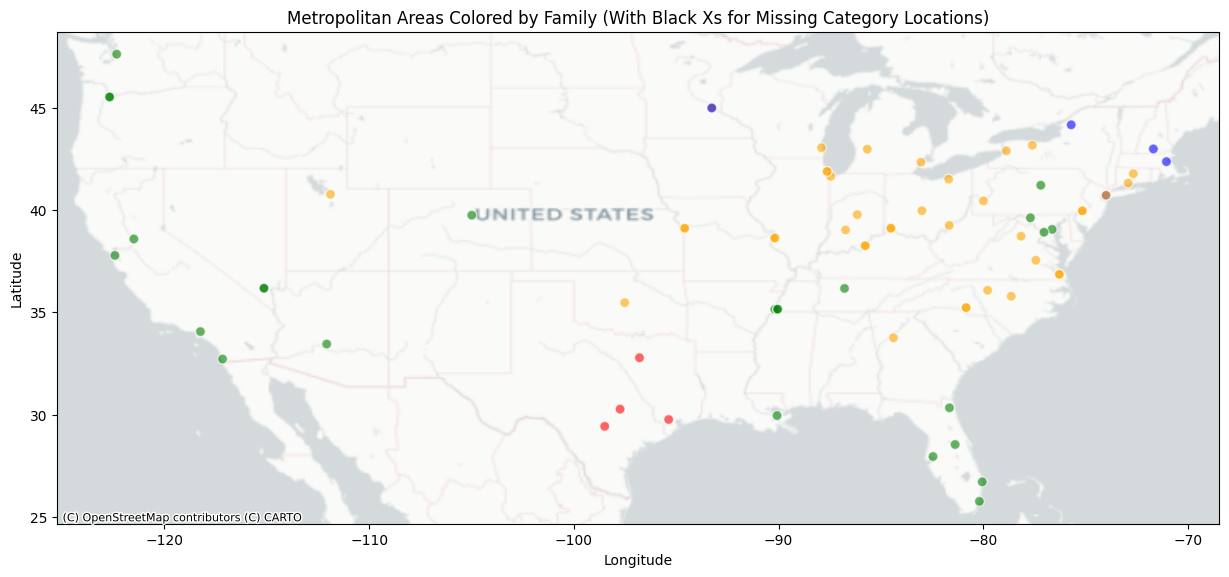

In [99]:
plot_geodata(df)